In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

## NOTE: Run this script if you do not already have a file called "raw_output.pkl" in the directory

### Import the raw data from EV Survey

In [12]:
df = pd.DataFrame(pd.read_excel(r'Discontinaunce_of_PEVs_in_California_Data_2021.03.01.xlsx', header=0))
data_labels = pd.DataFrame(pd.read_excel(r'Discontinaunce_of_PEVs_in_California_Data_2021.03.01.xlsx', header = None, sheet_name = 'Key'))

In [13]:
df.head()

,id. Response ID,[s] Year Submitted Survey 2,[s] Months Owned (total),oldcarmain. {TOKEN:ATTRIBUTE_1},[s] Electric driving range,oldcartype. {TOKEN:ATTRIBUTE_2} 2,[s] Discontinuance (inc. purchased lease) 2,[s] [1 (You)][Age: ] 2,"s4p1q3[SQ001_SQ002]. Please provide a brief description of your household. Start with yourself, then any other licensed drivers. [1 (You)][Gender]",dist1[SQ001]. [Route 1],...,s9p1q2[SQ008]. {oldcarmain.NAOK} [Electric driving range],s9p1q2[SQ009]. {oldcarmain.NAOK} [Convenience of charging],"s9p1q2[SQ010]. {oldcarmain.NAOK} [Driving assistance features (e.g. cruise control, automatic braking lane assist, etc.)]",s13p1q2. My household's pre-taxed income for the past tax year was in the following range:,"[s] Home Charging (L1, L2, None)","[s] Work charging (L1, L2, DC, none)",Concatenate[[s]...s] Public DCFC] 2,[s] MPG second vehicle in HH 2,"[s] Lease (1 lease, 0 other)",lastpage. Last page
0,1.0,2019.0,24.0,2016 BMW i3,81.0,PHEV,Continued,25.0,Male,13.92,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,2019.0,20.0,2018 Tesla Model 3 Long Range,310.0,BEV,Original,35.0,Male,10.25,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,2019.0,23.0,2017 Chevrolet Volt,53.0,PHEV,Original,45.0,Male,NaN,...,2.0,3.0,2.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,2019.0,45.0,2016 Tesla Model S,271.0,BEV,Original,45.0,Male,8.68,...,4.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,2019.0,19.0,2019 Nissan Leaf,84.0,BEV,Original,65.0,Male,NaN,...,4.0,5.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0


In [14]:
data_labels.head(30)

,0,1
0,id. Response ID,Response ID
1,[s] Year Submitted Survey 2,"Year Survey 2, the follow up survey, was submi..."
2,[s] Months Owned (total),"Months PEV has been owned for, or months owned..."
3,oldcarmain. {TOKEN:ATTRIBUTE_1},Yea Make and Model of PEV
4,[s] Electric driving range,US EPA Electric Driving Range of PEV
5,oldcartype. {TOKEN:ATTRIBUTE_2} 2,Vehicle Type
6,[s] Discontinuance (inc. purchased lease) 2,Whether respondents no longer own their origin...
7,[s] [1 (You)][Age: ] 2,Age of survey taker
8,s4p1q3[SQ001_SQ002]. Please provide a brief de...,Gender of survey taker
9,dist1[SQ001]. [Route 1],One way commute distance of main car


### Rename the columns to something more human readable.

In [15]:
df.columns = ['response_id', 'year_submitted_survey_2', 'months_owned', 'year_make_model', 'electric_range', 'ev_type', 'discontinuance',
             'surveyed_age', 'surveyed_gender', 'dist_1', 'trips_greater_200', 'safety_satisfaction', 'comfort_satisfaction', 'refuel_recharge_satisfaction',
             'performance_satisfaction', 'env_impact_satisfaction', 'purch_price_satisfaction', 'reliability_satisfaction', 'range_satisfaction',
             'charge_access_satisfaction', 'adas_satisfaction', 'household_income', 'home_charge_type', 'work_charge_type', 'highest_charge_used',
             'backup_vehicle_mpg', 'finance_type', 'last_page']

df.head()

,response_id,year_submitted_survey_2,months_owned,year_make_model,electric_range,ev_type,discontinuance,surveyed_age,surveyed_gender,dist_1,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page
0,1.0,2019.0,24.0,2016 BMW i3,81.0,PHEV,Continued,25.0,Male,13.92,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,2019.0,20.0,2018 Tesla Model 3 Long Range,310.0,BEV,Original,35.0,Male,10.25,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,2019.0,23.0,2017 Chevrolet Volt,53.0,PHEV,Original,45.0,Male,NaN,...,2.0,3.0,2.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,2019.0,45.0,2016 Tesla Model S,271.0,BEV,Original,45.0,Male,8.68,...,4.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,2019.0,19.0,2019 Nissan Leaf,84.0,BEV,Original,65.0,Male,NaN,...,4.0,5.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0


### What do the raw data columns look like? How many missing values are there?

In [16]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   4833 non-null   float64
 1   year_submitted_survey_2       4833 non-null   float64
 2   months_owned                  4330 non-null   float64
 3   year_make_model               4833 non-null   object 
 4   electric_range                4830 non-null   float64
 5   ev_type                       4673 non-null   object 
 6   discontinuance                4833 non-null   object 
 7   surveyed_age                  4373 non-null   float64
 8   surveyed_gender               4438 non-null   object 
 9   dist_1                        3811 non-null   float64
 10  trips_greater_200             4833 non-null   float64
 11  safety_satisfaction           4146 non-null   float64
 12  comfort_satisfaction          4146 non-null   float64
 13  ref

## What percentage of null values is present in each column?

In [26]:
print(100*df.isnull().mean().sort_values(ascending=True))

response_id                      0.041365
home_charge_type                 0.041365
finance_type                     0.041365
trips_greater_200                0.041365
discontinuance                   0.041365
last_page                        0.041365
year_submitted_survey_2          0.041365
year_make_model                  0.041365
electric_range                   0.103413
ev_type                          3.350569
surveyed_gender                  8.210962
surveyed_age                     9.555326
months_owned                    10.444674
adas_satisfaction               14.250259
charge_access_satisfaction      14.250259
range_satisfaction              14.250259
reliability_satisfaction        14.250259
purch_price_satisfaction        14.250259
performance_satisfaction        14.250259
comfort_satisfaction            14.250259
safety_satisfaction             14.250259
env_impact_satisfaction         14.250259
refuel_recharge_satisfaction    14.250259
household_income                15

Observations:
* The satisfaction survey results share an almost identical number of missing entries
* The peak missing value comes from the work_charge_type
* The discontinuance data fortunately contains <1% missing entries.

<AxesSubplot:>

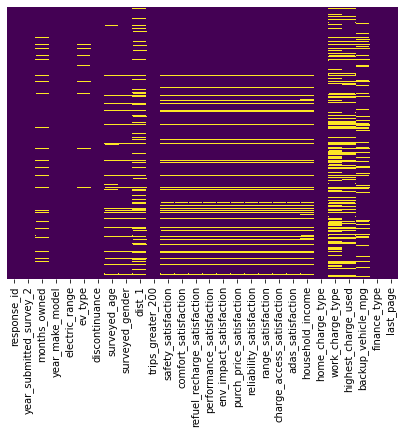

In [31]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

### Save the output dataframe to a pickle file for the next step

In [17]:
df.to_pickle("raw_output.pkl")

In [18]:
raw_output = pd.read_pickle("raw_output.pkl")

### Make sure that the data can be read back in as a Dataframe

In [19]:
raw_output.head()

,response_id,year_submitted_survey_2,months_owned,year_make_model,electric_range,ev_type,discontinuance,surveyed_age,surveyed_gender,dist_1,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page
0,1.0,2019.0,24.0,2016 BMW i3,81.0,PHEV,Continued,25.0,Male,13.92,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,2019.0,20.0,2018 Tesla Model 3 Long Range,310.0,BEV,Original,35.0,Male,10.25,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,2019.0,23.0,2017 Chevrolet Volt,53.0,PHEV,Original,45.0,Male,NaN,...,2.0,3.0,2.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,2019.0,45.0,2016 Tesla Model S,271.0,BEV,Original,45.0,Male,8.68,...,4.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,2019.0,19.0,2019 Nissan Leaf,84.0,BEV,Original,65.0,Male,NaN,...,4.0,5.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0
